<a href="https://colab.research.google.com/github/dudaholandah/NLP/blob/main/Projeto/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp -r '/content/drive/MyDrive/Datasets/cuisine-classification-ingredients' 'cuisine-classification-ingredients'

In [3]:
!cp -r '/content/drive/MyDrive/Datasets/indian-food' 'indian-food'

# Imports

In [4]:
!pip install transformers
!pip install keras
!pip install tensorflow
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 38.8 MB/s 
     |████████████████████████████████| 120 kB 86.0 MB/s 
     |████████████████████████████████| 6.6 MB 45.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 27.4 MB/s 
     |████████████████████████████████| 1.6 MB 59.0 MB/s 


In [5]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
#WORD2VEC
from gensim.models import Word2Vec
import nltk
nltk.download('punkt')
#BERT
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
#Neural Network
import keras_tuner as kt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv1D,Embedding,GlobalMaxPooling1D,MaxPooling1D,Activation,Flatten,SimpleRNN,Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.optimizers import SGD
from keras_tuner import HyperModel
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
#Data
import json
import os
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

# Data

Cuisine Classification Data

In [6]:
path = 'cuisine-classification-ingredients/train.json'

with open(path, 'r') as f:
  json = json.load(f)

In [7]:
df_cuisine = pd.DataFrame(json, columns=['id', 'cuisine', 'ingredients'])

In [8]:
df_cuisine = df_cuisine.drop(['id'], axis=1)

In [9]:
df_cuisine = df_cuisine[:1000]

In [10]:
df_cuisine.head(5)

,cuisine,ingredients
0,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,"[water, vegetable oil, wheat, salt]"
4,indian,"[black pepper, shallots, cornflour, cayenne pe..."


Indian Food Data

In [11]:
path = 'indian-food/indian_food.csv'
df_indian = pd.read_csv(path)

In [12]:
df_indian.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


## Pre-Processing

In [13]:
def pre_processing(text):
  new = ""
  for word in text.split(','):
    word = re.sub(r'[^\w\s]', '', word.lower())
    word = re.sub(r'[0-9]+', '', word)
    word = re.sub(r'\boz\b', '', word)
    word = re.sub(r'\ba taste of\b', '', word)
    new = new + word.strip() + " "

  return new[:-1]

Cuisine Classification Data

In [14]:
df_cuisine['ingredients'] = [','.join(x).strip() for x in df_cuisine['ingredients']]

In [15]:
df_cuisine['ingredients'] = [pre_processing(x) for x in df_cuisine['ingredients']]

In [126]:
X = df_cuisine['ingredients']
y = df_cuisine['cuisine']

# dados de teste = 20% do treinamento
X_train_cuisine, X_test_cuisine, y_train_cuisine, y_test_cuisine = train_test_split(X, y, test_size=0.2)

# dados de validacao = 50% do teste
X_test_cuisine, X_valid_cuisine, y_test_cuisine, y_valid_cuisine = train_test_split(X, y, test_size=0.5)

In [131]:
y_train_cuisine = pd.Categorical(y_train_cuisine)
y_train_int_cuisine = y_train_cuisine.codes

y_valid_cuisine = pd.Categorical(y_valid_cuisine)
y_valid_int_cuisine = y_valid_cuisine.codes

y_test_cuisine = pd.Categorical(y_test_cuisine)
y_test_int_cuisine = y_test_cuisine.codes

y_train_cuisine = to_categorical(y_train_int_cuisine)
y_valid_cuisine = to_categorical(y_valid_int_cuisine)
y_test_cuisine = to_categorical(y_test_int_cuisine)

Indian Food Data

In [18]:
df_indian['ingredients'] = [pre_processing(x) for x in df_indian['ingredients']]

In [132]:
X = df_indian['ingredients']
y = df_indian['diet']

# dados de teste = 20% do treinamento
X_train_indian, X_test_indian, y_train_indian, y_test_indian = train_test_split(X, y, test_size=0.2)

# dados de validacao = 50% do teste
X_test_indian, X_valid_indian, y_test_indian, y_valid_indian = train_test_split(X, y, test_size=0.5)

In [141]:
y_train_indian = pd.Categorical(y_train_indian)
y_train_int_indian = y_train_indian.codes

y_valid_indian = pd.Categorical(y_valid_indian)
y_valid_int_indian = y_valid_indian.codes

y_test_indian = pd.Categorical(y_test_indian)
y_test_int_indian = y_test_indian.codes

y_train_indian = to_categorical(y_train_int_indian)
y_valid_indian = to_categorical(y_valid_int_indian)
y_test_indian = to_categorical(y_test_int_indian)

# Different Embeddings

In [21]:
vocabulary_cuisine = {}
i = 0

for ingredients in df_cuisine['ingredients']:
  for word in ingredients.split():
    if word not in vocabulary_cuisine:
      vocabulary_cuisine[word] = i
      i += 1

In [22]:
vocabulary_indian = {}
i = 0

for ingredients in df_indian['ingredients']:
  for word in ingredients.split():
    if word not in vocabulary_indian:
      vocabulary_indian[word] = i
      i += 1

## TFIDF

Cuisine Classification Data

In [23]:
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary_cuisine)

In [24]:
# Training Data
tfidf_train_cuisine = tfidf_vectorizer.fit_transform(X_train_cuisine)
tfidf_train_cuisine = tfidf_train_cuisine.toarray()
df_tfidf_train_cuisine = pd.DataFrame(tfidf_train_cuisine, columns=tfidf_vectorizer.get_feature_names_out())

In [25]:
df_tfidf_train_cuisine.shape

(800, 1211)

In [26]:
# Validation Data
tfidf_valid_cuisine = tfidf_vectorizer.fit_transform(X_valid_cuisine)
tfidf_valid_cuisine = tfidf_valid_cuisine.toarray()
df_tfidf_valid_cuisine = pd.DataFrame(tfidf_valid_cuisine, columns=tfidf_vectorizer.get_feature_names_out())

In [27]:
df_tfidf_valid_cuisine.shape

(500, 1211)

In [28]:
# Test Data
tfidf_test_cuisine = tfidf_vectorizer.fit_transform(X_test_cuisine)
tfidf_test_cuisine = tfidf_test_cuisine.toarray()
df_tfidf_test_cuisine = pd.DataFrame(tfidf_test_cuisine, columns=tfidf_vectorizer.get_feature_names_out())

In [29]:
df_tfidf_test_cuisine.shape

(500, 1211)

Indian Food Data

In [30]:
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary_indian)

In [31]:
# Training Data
tfidf_train_indian = tfidf_vectorizer.fit_transform(X_train_indian)
tfidf_train_indian = tfidf_train_indian.toarray()
df_tfidf_train_indian = pd.DataFrame(tfidf_train_indian, columns=tfidf_vectorizer.get_feature_names_out())

In [32]:
df_tfidf_train_indian.shape

(204, 337)

In [33]:
# Validation Data
tfidf_valid_indian = tfidf_vectorizer.fit_transform(X_valid_indian)
tfidf_valid_indian = tfidf_valid_indian.toarray()
df_tfidf_valid_indian = pd.DataFrame(tfidf_valid_indian, columns=tfidf_vectorizer.get_feature_names_out())

In [34]:
df_tfidf_valid_indian.shape

(128, 337)

In [35]:
# Test Data
tfidf_test_indian = tfidf_vectorizer.fit_transform(X_test_indian)
tfidf_test_indian = tfidf_test_indian.toarray()
df_tfidf_test_indian = pd.DataFrame(tfidf_test_indian, columns=tfidf_vectorizer.get_feature_names_out())

In [36]:
df_tfidf_test_indian.shape

(127, 337)

## Word2Vec

In [37]:
def get_embedding_w2v(model, doc_tokens):
    embeddings = []
    for tok in doc_tokens:
        if tok in model.wv.vocab:
                embeddings.append(model.wv.word_vec(tok))
        else:
            embeddings.append(np.random.rand(300))
    return np.mean(embeddings, axis=0)

Cuisine Classification Data

In [38]:
# Train Data
ingredients = '. '.join(X_train_cuisine)
sentences = nltk.sent_tokenize(ingredients)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
model_word2vec = Word2Vec(sentences, size=300, min_count=1, window=5, sg=1,workers=4)
X_train_word2vec_cuisine = X_train_cuisine.apply(lambda x : get_embedding_w2v(model_word2vec, x.split()))
X_train_word2vec_cuisine = np.array([x.tolist() for x in X_train_word2vec_cuisine])

In [39]:
# Validation Data
ingredients = '. '.join(X_valid_cuisine)
sentences = nltk.sent_tokenize(ingredients)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
model_word2vec = Word2Vec(sentences, size=300, min_count=1, window=5, sg=1,workers=4)
X_valid_word2vec_cuisine = X_valid_cuisine.apply(lambda x : get_embedding_w2v(model_word2vec, x.split()))
X_valid_word2vec_cuisine = np.array([x.tolist() for x in X_valid_word2vec_cuisine])

In [40]:
# Test Data
ingredients = '. '.join(X_test_cuisine)
sentences = nltk.sent_tokenize(ingredients)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
model_word2vec = Word2Vec(sentences, size=300, min_count=1, window=5, sg=1,workers=4)
X_test_word2vec_cuisine = X_test_cuisine.apply(lambda x : get_embedding_w2v(model_word2vec, x.split()))
X_test_word2vec_cuisine = np.array([x.tolist() for x in X_test_word2vec_cuisine])

Indian Food Data

In [41]:
# Train Data
ingredients = '. '.join(X_train_indian)
sentences = nltk.sent_tokenize(ingredients)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
model_word2vec = Word2Vec(sentences, size=300, min_count=1, window=5, sg=1,workers=1)
X_train_word2vec_indian = X_train_indian.apply(lambda x : get_embedding_w2v(model_word2vec, x.split()))
X_train_word2vec_indian = np.array([x.tolist() for x in X_train_word2vec_indian])

In [42]:
# Validation Data
ingredients = '. '.join(X_valid_indian)
sentences = nltk.sent_tokenize(ingredients)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
model_word2vec = Word2Vec(sentences, size=300, min_count=1, window=5, sg=1,workers=1)
X_valid_word2vec_indian = X_valid_indian.apply(lambda x : get_embedding_w2v(model_word2vec, x.split()))
X_valid_word2vec_indian = np.array([x.tolist() for x in X_valid_word2vec_indian])

In [43]:
# Test Data
ingredients = '. '.join(X_test_indian)
sentences = nltk.sent_tokenize(ingredients)
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
model_word2vec = Word2Vec(sentences, size=300, min_count=1, window=5, sg=1,workers=1)
X_test_word2vec_indian = X_test_indian.apply(lambda x : get_embedding_w2v(model_word2vec, x.split()))
X_test_word2vec_indian = np.array([x.tolist() for x in X_test_word2vec_indian])

## BERT

In [44]:
#bert_model_sentence = SentenceTransformer('bert-base-nli-mean-tokens')

In [45]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = TFBertModel.from_pretrained("bert-base-multilingual-cased")

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Cuisine Classification Data

In [46]:
# Train Data
encoded_input = [tokenizer(text, return_tensors='tf') for text in X_train_cuisine]
xs = [model(text) for text in encoded_input]
X_train_bert_cuisine = [text[1][0].numpy() for text in xs]
X_train_bert_cuisine = np.array(X_train_bert_cuisine)

In [47]:
# Validation Data
encoded_input = [tokenizer(text, return_tensors='tf') for text in X_valid_cuisine]
xs = [model(text) for text in encoded_input]
X_valid_bert_cuisine = [text[1][0].numpy() for text in xs]
X_valid_bert_cuisine = np.array(X_valid_bert_cuisine)

In [48]:
# Test Data
encoded_input = [tokenizer(text, return_tensors='tf') for text in X_test_cuisine]
xs = [model(text) for text in encoded_input]
X_test_bert_cuisine = [text[1][0].numpy() for text in xs]
X_test_bert_cuisine = np.array(X_test_bert_cuisine)

Indian Food Data

In [49]:
# Train Data
encoded_input = [tokenizer(text, return_tensors='tf') for text in X_train_indian]
xs = [model(text) for text in encoded_input]
X_train_bert_indian = [text[1][0].numpy() for text in xs]
X_train_bert_indian = np.array(X_train_bert_indian)

In [50]:
# Validation Data
encoded_input = [tokenizer(text, return_tensors='tf') for text in X_valid_indian]
xs = [model(text) for text in encoded_input]
X_valid_bert_indian = [text[1][0].numpy() for text in xs]
X_valid_bert_indian = np.array(X_valid_bert_indian)

In [51]:
# Test Data
encoded_input = [tokenizer(text, return_tensors='tf') for text in X_test_indian]
xs = [model(text) for text in encoded_input]
X_test_bert_indian = [text[1][0].numpy() for text in xs]
X_test_bert_indian = np.array(X_test_bert_indian)

# Different Classificators

In [54]:
vocab_size_cuisine = len(vocabulary_cuisine)
vocab_size_indian = len(vocabulary_indian)

## CNN

In [53]:
class CNNHyperModel(HyperModel):
  def __init__(self, vocab_size, max_length, output):
    self.vocab_size = vocab_size
    self.max_length = max_length
    self.output = output

  def build(self, hp):
    model = Sequential()
    model.add(Embedding(self.vocab_size, output_dim = 32, input_length=self.max_length))
    model.add(Conv1D(filters=hp.Int("conv_1", min_value=32, max_value=96, step=32), kernel_size=11, strides=1))
    model.add(Activation('relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(hp.Choice("dense_units", [64,128,256])))
    model.add(Activation('relu'))
    model.add(Dense(hp.Choice("dense_units2", [16,32, 64])))
    model.add(Activation('relu'))
    model.add(Dense(self.output, activation='softmax'))
    sgd = SGD(learning_rate=hp.Choice("learning_rt", [0.01,0.001,0.001]))
    model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])
    return model

### TFIDF

Cuisine Classification Data

In [54]:
model_CNN = CNNHyperModel(vocab_size_cuisine, vocab_size_cuisine, 20)

In [55]:
tuner = kt.Hyperband(
    model_CNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2,
    overwrite=True)

In [56]:
tuner.search(df_tfidf_train_cuisine,y_train_cuisine,validation_data=(df_tfidf_valid_cuisine,y_valid_cuisine), epochs=10)

Trial 65 Complete [00h 00m 02s]
val_accuracy: 0.1860000044107437

Best val_accuracy So Far: 0.19200000166893005
Total elapsed time: 00h 02m 21s


In [57]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in conv_1 layer: {}".format(bestHP.get("conv_1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal number of units in dense layer 2: {}".format(bestHP.get("dense_units2")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in conv_1 layer: 96
[INFO] optimal number of units in dense layer: 128
[INFO] optimal number of units in dense layer 2: 16
[INFO] optimal learning rate: 0.001


In [58]:
model_cuisine = tuner.get_best_models()[0]

In [59]:
history_fine = model_cuisine.fit(df_tfidf_train_cuisine,y_train_cuisine,validation_data=(df_tfidf_valid_cuisine,y_valid_cuisine), epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 18ms/step - loss: 2.9912 - accuracy: 0.1813 - val_loss: 2.9894 - val_accuracy: 0.1860
Epoch 2/10
25/25 [==============================] - 0s 10ms/step - loss: 2.9883 - accuracy: 0.2013 - val_loss: 2.9867 - val_accuracy: 0.1860
Epoch 3/10
25/25 [==============================] - 0s 10ms/step - loss: 2.9857 - accuracy: 0.2013 - val_loss: 2.9840 - val_accuracy: 0.1860
Epoch 4/10
25/25 [==============================] - 0s 10ms/step - loss: 2.9831 - accuracy: 0.2013 - val_loss: 2.9815 - val_accuracy: 0.1860
Epoch 5/10
25/25 [==============================] - 0s 10ms/step - loss: 2.9805 - accuracy: 0.2013 - val_loss: 2.9789 - val_accuracy: 0.1860
Epoch 6/10
25/25 [==============================] - 0s 10ms/step - loss: 2.9781 - accuracy: 0.2013 - val_loss: 2.9765 - val_accuracy: 0.1860
Epoch 7/10
25/25 [==============================] - 0s 10ms/step - loss: 2.9757 - accuracy: 0.2013 - val_loss: 2.9741 - val_accuracy: 0.1860
Epoch 8/10
25

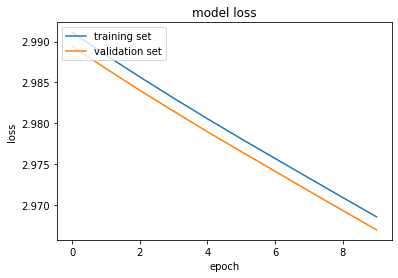

In [60]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

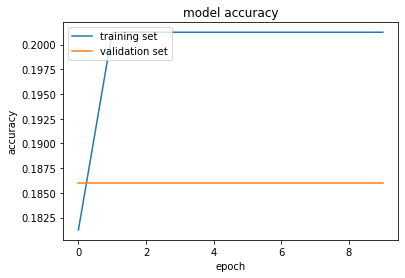

In [61]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [62]:
y_prob = model_cuisine.predict(df_tfidf_test_cuisine)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_cuisine,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         8
           9       0.24      1.00      0.38       118
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        18
          13       0.00      0.00      0.00        81
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        53
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Indian Food Data

In [63]:
model_CNN = CNNHyperModel(vocab_size_indian, vocab_size_indian, 2)

In [64]:
tuner = kt.Hyperband(
    model_CNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [65]:
tuner.search(df_tfidf_train_indian,y_train_indian,validation_data=(df_tfidf_valid_indian,y_valid_indian), epochs=10)

Trial 64 Complete [00h 00m 01s]
val_accuracy: 0.890625

Best val_accuracy So Far: 0.890625
Total elapsed time: 00h 01m 27s


In [66]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in conv_1 layer: {}".format(bestHP.get("conv_1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal number of units in dense layer 2: {}".format(bestHP.get("dense_units2")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in conv_1 layer: 96
[INFO] optimal number of units in dense layer: 128
[INFO] optimal number of units in dense layer 2: 16
[INFO] optimal learning rate: 0.001


In [67]:
model_indian = tuner.get_best_models()[0]

In [68]:
history_fine = model_indian.fit(df_tfidf_train_indian,y_train_indian,validation_data=(df_tfidf_valid_indian,y_valid_indian), epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 37ms/step - loss: 0.6903 - accuracy: 0.8824 - val_loss: 0.6881 - val_accuracy: 0.8906
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6868 - accuracy: 0.8824 - val_loss: 0.6845 - val_accuracy: 0.8906
Epoch 3/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6834 - accuracy: 0.8824 - val_loss: 0.6811 - val_accuracy: 0.8906
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 0.6801 - accuracy: 0.8824 - val_loss: 0.6776 - val_accuracy: 0.8906
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6768 - accuracy: 0.8824 - val_loss: 0.6747 - val_accuracy: 0.8906
Epoch 6/10
7/7 [==============================] - 0s 10ms/step - loss: 0.6742 - accuracy: 0.8824 - val_loss: 0.6723 - val_accuracy: 0.8906
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6718 - accuracy: 0.8824 - val_loss: 0.6699 - val_accuracy: 0.8906
Epoch 8/10
7/7 [============

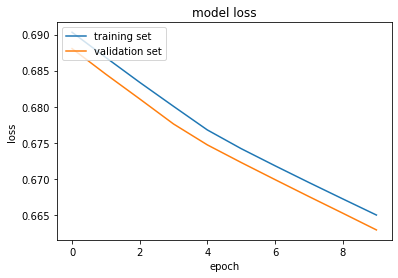

In [69]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

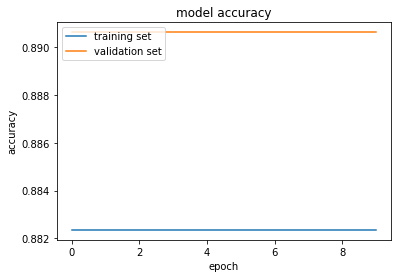

In [70]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [71]:
y_prob = model_indian.predict(df_tfidf_test_indian)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_indian,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.88      1.00      0.94       112

    accuracy                           0.88       127
   macro avg       0.44      0.50      0.47       127
weighted avg       0.78      0.88      0.83       127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Word2vec

Cuisine Classification Data

In [72]:
X_train_word2vec_cuisine = np.array([np.array(val) for val in X_train_word2vec_cuisine])
X_valid_word2vec_cuisine = np.array([np.array(val) for val in X_valid_word2vec_cuisine])

In [73]:
model_CNN = CNNHyperModel(vocab_size_cuisine, 300, 20)

In [74]:
tuner = kt.Hyperband(
    model_CNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [75]:
tuner.search(X_train_word2vec_cuisine,y_train_cuisine,validation_data=(X_valid_word2vec_cuisine,y_valid_cuisine) , epochs=10)

Trial 56 Complete [00h 00m 02s]
val_accuracy: 0.1860000044107437

Best val_accuracy So Far: 0.19200000166893005
Total elapsed time: 00h 01m 29s


In [76]:
model_cuisine = tuner.get_best_models()[0]

In [77]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in conv_1 layer: {}".format(bestHP.get("conv_1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal number of units in dense layer 2: {}".format(bestHP.get("dense_units2")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in conv_1 layer: 96
[INFO] optimal number of units in dense layer: 64
[INFO] optimal number of units in dense layer 2: 16
[INFO] optimal learning rate: 0.001


In [78]:
history_fine = model_cuisine.fit(X_train_word2vec_cuisine,y_train_cuisine,validation_data=(X_valid_word2vec_cuisine,y_valid_cuisine) , epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 14ms/step - loss: 2.9910 - accuracy: 0.1800 - val_loss: 2.9893 - val_accuracy: 0.1920
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 2.9882 - accuracy: 0.1800 - val_loss: 2.9865 - val_accuracy: 0.1920
Epoch 3/20
25/25 [==============================] - 0s 8ms/step - loss: 2.9854 - accuracy: 0.1800 - val_loss: 2.9837 - val_accuracy: 0.1920
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 2.9827 - accuracy: 0.1800 - val_loss: 2.9811 - val_accuracy: 0.1920
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 2.9801 - accuracy: 0.1800 - val_loss: 2.9784 - val_accuracy: 0.1920
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 2.9775 - accuracy: 0.1800 - val_loss: 2.9759 - val_accuracy: 0.1920
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss: 2.9750 - accuracy: 0.1800 - val_loss: 2.9734 - val_accuracy: 0.1920
Epoch 8/20
25/25 [=

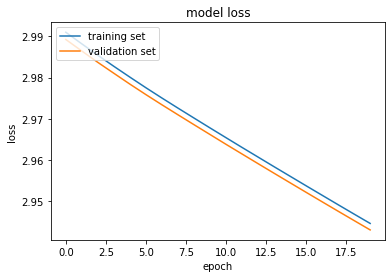

In [79]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

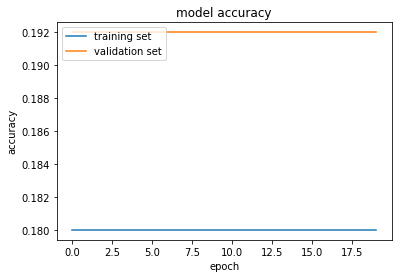

In [80]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [81]:
y_prob = model_cuisine.predict(X_test_word2vec_cuisine)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_cuisine,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00       118
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        18
          13       0.16      1.00      0.28        81
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        53
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Indian Food Data

In [82]:
X_train_word2vec_indian = np.array([np.array(val) for val in X_train_word2vec_indian])
X_valid_word2vec_indian = np.array([np.array(val) for val in X_valid_word2vec_indian])

In [83]:
model_CNN = CNNHyperModel(vocab_size_indian, 300, 2)

In [84]:
tuner = kt.Hyperband(
    model_CNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [85]:
tuner.search(X_train_word2vec_indian,y_train_indian,validation_data=(X_valid_word2vec_indian,y_valid_indian) , epochs=10)

Trial 65 Complete [00h 00m 01s]
val_accuracy: 0.890625

Best val_accuracy So Far: 0.890625
Total elapsed time: 00h 01m 25s


In [86]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in conv_1 layer: {}".format(bestHP.get("conv_1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal number of units in dense layer 2: {}".format(bestHP.get("dense_units2")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in conv_1 layer: 64
[INFO] optimal number of units in dense layer: 64
[INFO] optimal number of units in dense layer 2: 32
[INFO] optimal learning rate: 0.001


In [87]:
model_indian = tuner.get_best_models()[0]

In [88]:
history_fine = model_indian.fit(X_train_word2vec_indian,y_train_indian,validation_data=(X_valid_word2vec_indian,y_valid_indian) , epochs=20)

Epoch 1/20
7/7 [==============================] - 1s 34ms/step - loss: 0.6816 - accuracy: 0.8824 - val_loss: 0.6789 - val_accuracy: 0.8906
Epoch 2/20
7/7 [==============================] - 0s 8ms/step - loss: 0.6776 - accuracy: 0.8824 - val_loss: 0.6749 - val_accuracy: 0.8906
Epoch 3/20
7/7 [==============================] - 0s 9ms/step - loss: 0.6738 - accuracy: 0.8824 - val_loss: 0.6710 - val_accuracy: 0.8906
Epoch 4/20
7/7 [==============================] - 0s 9ms/step - loss: 0.6700 - accuracy: 0.8824 - val_loss: 0.6673 - val_accuracy: 0.8906
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6664 - accuracy: 0.8824 - val_loss: 0.6633 - val_accuracy: 0.8906
Epoch 6/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6625 - accuracy: 0.8824 - val_loss: 0.6595 - val_accuracy: 0.8906
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.6588 - accuracy: 0.8824 - val_loss: 0.6559 - val_accuracy: 0.8906
Epoch 8/20
7/7 [==============

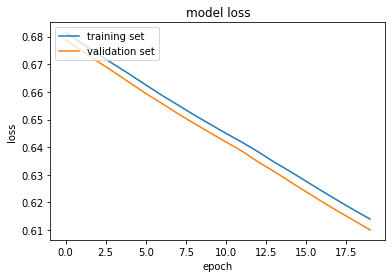

In [89]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

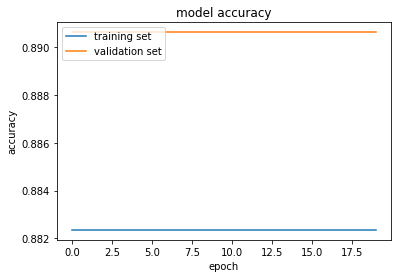

In [90]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [91]:
y_prob = model_indian.predict(X_test_word2vec_indian)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_indian,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.88      1.00      0.94       112

    accuracy                           0.88       127
   macro avg       0.44      0.50      0.47       127
weighted avg       0.78      0.88      0.83       127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### BERT

Cuisine Classification Data

In [92]:
model_CNN = CNNHyperModel(vocab_size_cuisine, 768, 20)

In [93]:
tuner = kt.Hyperband(
    model_CNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [94]:
tuner.search(X_train_bert_cuisine,y_train_cuisine,validation_data=(X_valid_bert_cuisine,y_valid_cuisine), epochs=10)

Trial 64 Complete [00h 00m 02s]
val_accuracy: 0.1860000044107437

Best val_accuracy So Far: 0.19200000166893005
Total elapsed time: 00h 01m 53s


In [95]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in conv_1 layer: {}".format(bestHP.get("conv_1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal number of units in dense layer 2: {}".format(bestHP.get("dense_units2")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in conv_1 layer: 64
[INFO] optimal number of units in dense layer: 256
[INFO] optimal number of units in dense layer 2: 16
[INFO] optimal learning rate: 0.001


In [96]:
model_cuisine = tuner.get_best_models()[0]

In [97]:
history_fine = model_cuisine.fit(X_train_bert_cuisine,y_train_cuisine,validation_data=(X_valid_bert_cuisine,y_valid_cuisine), epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 16ms/step - loss: 2.9923 - accuracy: 0.1800 - val_loss: 2.9913 - val_accuracy: 0.1920
Epoch 2/10
25/25 [==============================] - 0s 9ms/step - loss: 2.9902 - accuracy: 0.1800 - val_loss: 2.9893 - val_accuracy: 0.1920
Epoch 3/10
25/25 [==============================] - 0s 8ms/step - loss: 2.9883 - accuracy: 0.1800 - val_loss: 2.9874 - val_accuracy: 0.1920
Epoch 4/10
25/25 [==============================] - 0s 8ms/step - loss: 2.9864 - accuracy: 0.1800 - val_loss: 2.9856 - val_accuracy: 0.1920
Epoch 5/10
25/25 [==============================] - 0s 8ms/step - loss: 2.9845 - accuracy: 0.1800 - val_loss: 2.9837 - val_accuracy: 0.1920
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 2.9826 - accuracy: 0.1800 - val_loss: 2.9819 - val_accuracy: 0.1920
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 2.9807 - accuracy: 0.1800 - val_loss: 2.9800 - val_accuracy: 0.1920
Epoch 8/10
25/25 [=

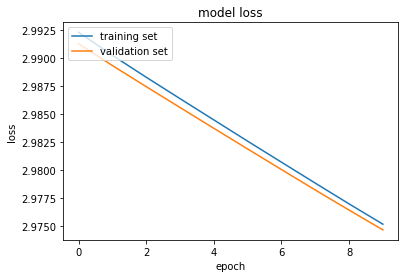

In [98]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

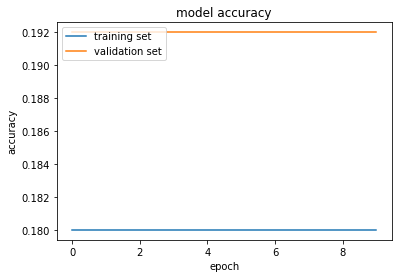

In [99]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [100]:
y_prob = model_cuisine.predict(X_test_bert_cuisine)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_cuisine,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        19
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00       118
          10       0.00      0.00      0.00         6
          11       0.00      0.00      0.00        21
          12       0.00      0.00      0.00        18
          13       0.16      1.00      0.28        81
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        53
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Indian Food Data

In [101]:
model_CNN = CNNHyperModel(vocab_size_indian, 768, 2)

In [102]:
tuner = kt.Hyperband(
    model_CNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [103]:
tuner.search(X_train_bert_indian,y_train_indian,validation_data=(X_valid_bert_indian,y_valid_indian), epochs=10)

Trial 66 Complete [00h 00m 01s]
val_accuracy: 0.890625

Best val_accuracy So Far: 0.890625
Total elapsed time: 00h 01m 29s


In [104]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in conv_1 layer: {}".format(bestHP.get("conv_1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal number of units in dense layer 2: {}".format(bestHP.get("dense_units2")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in conv_1 layer: 64
[INFO] optimal number of units in dense layer: 256
[INFO] optimal number of units in dense layer 2: 32
[INFO] optimal learning rate: 0.001


In [105]:
model_indian = tuner.get_best_models()[0]

In [106]:
history_fine = model_indian.fit(X_train_bert_indian,y_train_indian,validation_data=(X_valid_bert_indian,y_valid_indian), epochs=10)

Epoch 1/10
7/7 [==============================] - 1s 36ms/step - loss: 0.6846 - accuracy: 0.8824 - val_loss: 0.6817 - val_accuracy: 0.8906
Epoch 2/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6804 - accuracy: 0.8824 - val_loss: 0.6774 - val_accuracy: 0.8906
Epoch 3/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6762 - accuracy: 0.8824 - val_loss: 0.6732 - val_accuracy: 0.8906
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6722 - accuracy: 0.8824 - val_loss: 0.6695 - val_accuracy: 0.8906
Epoch 5/10
7/7 [==============================] - 0s 13ms/step - loss: 0.6686 - accuracy: 0.8824 - val_loss: 0.6657 - val_accuracy: 0.8906
Epoch 6/10
7/7 [==============================] - 0s 14ms/step - loss: 0.6649 - accuracy: 0.8824 - val_loss: 0.6622 - val_accuracy: 0.8906
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.6616 - accuracy: 0.8824 - val_loss: 0.6589 - val_accuracy: 0.8906
Epoch 8/10
7/7 [===========

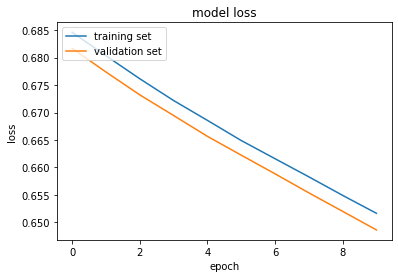

In [107]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

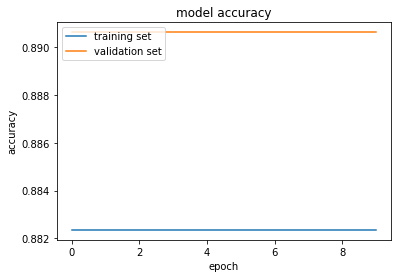

In [108]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [109]:
y_prob = model_indian.predict(X_test_bert_indian)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_indian,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.88      1.00      0.94       112

    accuracy                           0.88       127
   macro avg       0.44      0.50      0.47       127
weighted avg       0.78      0.88      0.83       127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RNN

In [57]:
from keras_tuner import HyperModel

class RNNHyperModel(HyperModel):
    def __init__(self, vocab_size, max_length, output):
        self.vocab_size = vocab_size
        self.max_length = max_length
        self.output = output

    def build(self, hp):
        model = keras.Sequential()
        model = Sequential()
        model.add(Embedding(self.vocab_size, output_dim = 32, input_length=self.max_length))
        model.add(SimpleRNN(hp.Choice("rnn1", [64,128]), activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(hp.Choice("dense_units", [32, 64]), activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(self.output, activation="softmax"))
        sgd = SGD(learning_rate=hp.Choice("learning_rt", [0.001,0.001]))
        model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])
        return model

### TFIDF

Cuisine Classification Data

In [58]:
model_RNN = RNNHyperModel(vocab_size_cuisine, vocab_size_cuisine, 20)

In [59]:
tuner = kt.Hyperband(
    model_RNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [60]:
tuner.search(df_tfidf_train_cuisine,y_train_cuisine,validation_data=(df_tfidf_valid_cuisine,y_valid_cuisine), epochs=10)

Trial 4 Complete [00h 00m 22s]
val_accuracy: 0.20999999344348907

Best val_accuracy So Far: 0.20999999344348907
Total elapsed time: 00h 01m 12s


In [61]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in rnn1 layer: {}".format(bestHP.get("rnn1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in rnn1 layer: 64
[INFO] optimal number of units in dense layer: 32
[INFO] optimal learning rate: 0.001


In [62]:
model_cuisine = tuner.get_best_models()[0]

In [63]:
history_fine = model_cuisine.fit(df_tfidf_train_cuisine,y_train_cuisine,validation_data=(df_tfidf_valid_cuisine,y_valid_cuisine), epochs=10)

Epoch 1/10
25/25 [==============================] - 7s 235ms/step - loss: 2.9898 - accuracy: 0.0650 - val_loss: 2.9873 - val_accuracy: 0.2100
Epoch 2/10
25/25 [==============================] - 6s 224ms/step - loss: 2.9858 - accuracy: 0.0913 - val_loss: 2.9843 - val_accuracy: 0.2100
Epoch 3/10
25/25 [==============================] - 6s 225ms/step - loss: 2.9805 - accuracy: 0.1175 - val_loss: 2.9811 - val_accuracy: 0.2100
Epoch 4/10
25/25 [==============================] - 6s 225ms/step - loss: 2.9806 - accuracy: 0.1287 - val_loss: 2.9785 - val_accuracy: 0.2100
Epoch 5/10
25/25 [==============================] - 6s 248ms/step - loss: 2.9769 - accuracy: 0.1450 - val_loss: 2.9758 - val_accuracy: 0.2100
Epoch 6/10
25/25 [==============================] - 6s 227ms/step - loss: 2.9747 - accuracy: 0.1612 - val_loss: 2.9730 - val_accuracy: 0.1520
Epoch 7/10
25/25 [==============================] - 6s 225ms/step - loss: 2.9731 - accuracy: 0.1400 - val_loss: 2.9703 - val_accuracy: 0.1520
Epoch 

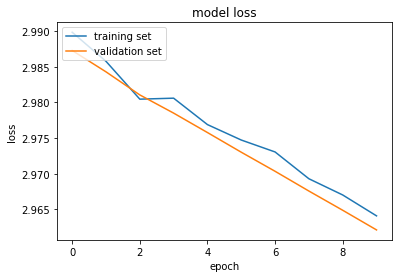

In [64]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

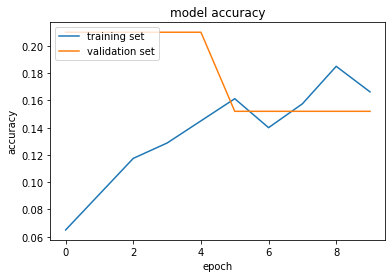

In [65]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [66]:
y_prob = model_cuisine.predict(df_tfidf_test_cuisine)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_cuisine,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00       106
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        19
          13       0.20      1.00      0.34       101
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00        44
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Indian Food Data

In [70]:
model_RNN = RNNHyperModel(vocab_size_indian, vocab_size_indian, 2)

In [71]:
tuner = kt.Hyperband(
    model_RNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [72]:
tuner.search(df_tfidf_train_indian,y_train_indian,validation_data=(df_tfidf_valid_indian,y_valid_indian), epochs=10)

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.1328125

Best val_accuracy So Far: 0.8671875
Total elapsed time: 00h 00m 12s


In [73]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in rnn1 layer: {}".format(bestHP.get("rnn1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in rnn1 layer: 64
[INFO] optimal number of units in dense layer: 32
[INFO] optimal learning rate: 0.001


In [74]:
model_indian = tuner.get_best_models()[0]

In [75]:
history_fine = model_indian.fit(df_tfidf_train_indian,y_train_indian,validation_data=(df_tfidf_valid_indian,y_valid_indian), epochs=10)

Epoch 1/10
7/7 [==============================] - 3s 200ms/step - loss: 0.6904 - accuracy: 0.5931 - val_loss: 0.6863 - val_accuracy: 0.8672
Epoch 2/10
7/7 [==============================] - 1s 114ms/step - loss: 0.6850 - accuracy: 0.6912 - val_loss: 0.6807 - val_accuracy: 0.8672
Epoch 3/10
7/7 [==============================] - 1s 132ms/step - loss: 0.6783 - accuracy: 0.8480 - val_loss: 0.6762 - val_accuracy: 0.8672
Epoch 4/10
7/7 [==============================] - 1s 122ms/step - loss: 0.6743 - accuracy: 0.8676 - val_loss: 0.6717 - val_accuracy: 0.8672
Epoch 5/10
7/7 [==============================] - 1s 120ms/step - loss: 0.6710 - accuracy: 0.8873 - val_loss: 0.6658 - val_accuracy: 0.8672
Epoch 6/10
7/7 [==============================] - 1s 137ms/step - loss: 0.6637 - accuracy: 0.8922 - val_loss: 0.6615 - val_accuracy: 0.8672
Epoch 7/10
7/7 [==============================] - 1s 127ms/step - loss: 0.6588 - accuracy: 0.8922 - val_loss: 0.6578 - val_accuracy: 0.8672
Epoch 8/10
7/7 [====

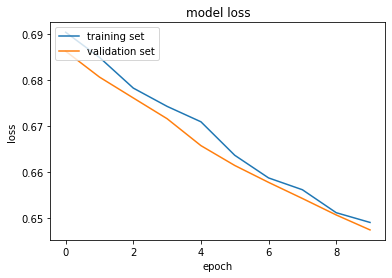

In [76]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

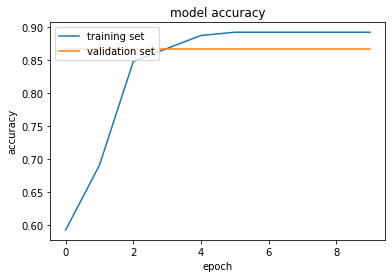

In [77]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [78]:
y_prob = model_indian.predict(df_tfidf_test_indian)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_indian,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.91      1.00      0.95       115

    accuracy                           0.91       127
   macro avg       0.45      0.50      0.48       127
weighted avg       0.82      0.91      0.86       127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Word2vec

Cuisine Classification Data

In [79]:
X_train_word2vec_cuisine = np.array([np.array(val) for val in X_train_word2vec_cuisine])
X_valid_word2vec_cuisine = np.array([np.array(val) for val in X_valid_word2vec_cuisine])

In [80]:
model_RNN = RNNHyperModel(vocab_size_cuisine, 300, 20)

In [81]:
tuner = kt.Hyperband(
    model_RNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [82]:
tuner.search(X_train_word2vec_cuisine,y_train_cuisine,validation_data=(X_valid_word2vec_cuisine,y_valid_cuisine) , epochs=10)

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.20999999344348907

Best val_accuracy So Far: 0.20999999344348907
Total elapsed time: 00h 00m 17s


In [83]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in rnn1 layer: {}".format(bestHP.get("rnn1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in rnn1 layer: 64
[INFO] optimal number of units in dense layer: 32
[INFO] optimal learning rate: 0.001


In [84]:
model_cuisine = tuner.get_best_models()[0]

In [85]:
history_fine = model_cuisine.fit(X_train_word2vec_cuisine,y_train_cuisine,validation_data=(X_valid_word2vec_cuisine,y_valid_cuisine) , epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 56ms/step - loss: 2.9877 - accuracy: 0.1063 - val_loss: 2.9861 - val_accuracy: 0.2100
Epoch 2/20
25/25 [==============================] - 1s 48ms/step - loss: 2.9822 - accuracy: 0.1325 - val_loss: 2.9820 - val_accuracy: 0.2100
Epoch 3/20
25/25 [==============================] - 1s 49ms/step - loss: 2.9768 - accuracy: 0.1287 - val_loss: 2.9772 - val_accuracy: 0.2100
Epoch 4/20
25/25 [==============================] - 1s 49ms/step - loss: 2.9723 - accuracy: 0.1475 - val_loss: 2.9726 - val_accuracy: 0.2100
Epoch 5/20
25/25 [==============================] - 1s 47ms/step - loss: 2.9658 - accuracy: 0.1250 - val_loss: 2.9677 - val_accuracy: 0.2100
Epoch 6/20
25/25 [==============================] - 1s 49ms/step - loss: 2.9662 - accuracy: 0.1513 - val_loss: 2.9629 - val_accuracy: 0.2100
Epoch 7/20
25/25 [==============================] - 1s 48ms/step - loss: 2.9544 - accuracy: 0.1425 - val_loss: 2.9576 - val_accuracy: 0.2100
Epoch 8/20
25

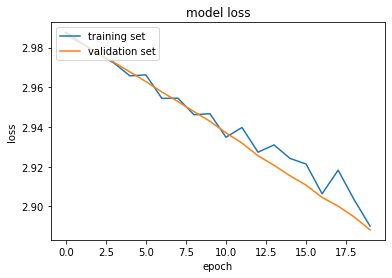

In [86]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

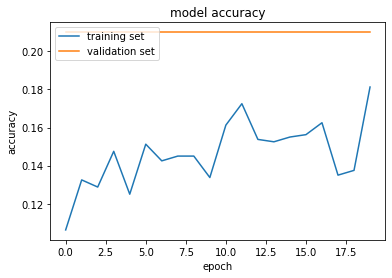

In [87]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [88]:
y_prob = model_cuisine.predict(X_test_word2vec_cuisine)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_cuisine,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00        11
           9       0.21      1.00      0.35       106
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00       101
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00        44
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Indian Food Data

In [89]:
X_train_word2vec_indian = np.array([np.array(val) for val in X_train_word2vec_indian])
X_valid_word2vec_indian = np.array([np.array(val) for val in X_valid_word2vec_indian])

In [90]:
model_RNN = RNNHyperModel(vocab_size_indian, 300, 2)

In [91]:
tuner = kt.Hyperband(
    model_RNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [92]:
tuner.search(X_train_word2vec_indian,y_train_indian,validation_data=(X_valid_word2vec_indian,y_valid_indian), epochs=10)

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.1328125

Best val_accuracy So Far: 0.8671875
Total elapsed time: 00h 00m 13s


In [93]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in rnn1 layer: {}".format(bestHP.get("rnn1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in rnn1 layer: 128
[INFO] optimal number of units in dense layer: 64
[INFO] optimal learning rate: 0.001


In [94]:
model_indian = tuner.get_best_models()[0]

In [95]:
history_fine = model_indian.fit(X_train_word2vec_indian,y_train_indian,validation_data=(X_valid_word2vec_indian,y_valid_indian) , epochs=20)

Epoch 1/20
7/7 [==============================] - 2s 118ms/step - loss: 0.6935 - accuracy: 0.5245 - val_loss: 0.6871 - val_accuracy: 0.8672
Epoch 2/20
7/7 [==============================] - 1s 83ms/step - loss: 0.6899 - accuracy: 0.6029 - val_loss: 0.6819 - val_accuracy: 0.8672
Epoch 3/20
7/7 [==============================] - 1s 84ms/step - loss: 0.6860 - accuracy: 0.6127 - val_loss: 0.6771 - val_accuracy: 0.8672
Epoch 4/20
7/7 [==============================] - 1s 83ms/step - loss: 0.6823 - accuracy: 0.6814 - val_loss: 0.6721 - val_accuracy: 0.8672
Epoch 5/20
7/7 [==============================] - 1s 82ms/step - loss: 0.6762 - accuracy: 0.7598 - val_loss: 0.6674 - val_accuracy: 0.8672
Epoch 6/20
7/7 [==============================] - 1s 84ms/step - loss: 0.6714 - accuracy: 0.7941 - val_loss: 0.6631 - val_accuracy: 0.8672
Epoch 7/20
7/7 [==============================] - 1s 83ms/step - loss: 0.6698 - accuracy: 0.8235 - val_loss: 0.6591 - val_accuracy: 0.8672
Epoch 8/20
7/7 [==========

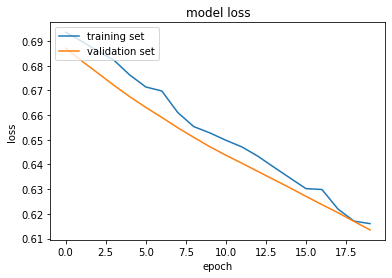

In [96]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

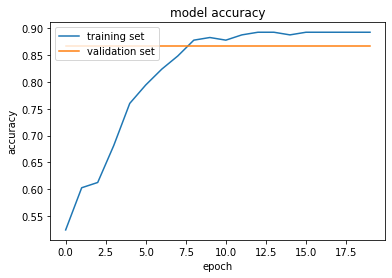

In [97]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [98]:
y_prob = model_indian.predict(X_test_word2vec_indian)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_indian,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.91      1.00      0.95       115

    accuracy                           0.91       127
   macro avg       0.45      0.50      0.48       127
weighted avg       0.82      0.91      0.86       127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### BERT

Cuisine Classification Data

In [99]:
model_RNN = RNNHyperModel(vocab_size_cuisine, 768, 20)

In [100]:
tuner = kt.Hyperband(
    model_RNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [101]:
tuner.search(X_train_bert_cuisine,y_train_cuisine,validation_data=(X_valid_bert_cuisine,y_valid_cuisine), epochs=10)

Trial 4 Complete [00h 00m 10s]
val_accuracy: 0.20999999344348907

Best val_accuracy So Far: 0.20999999344348907
Total elapsed time: 00h 00m 44s


In [102]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in rnn1 layer: {}".format(bestHP.get("rnn1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in rnn1 layer: 64
[INFO] optimal number of units in dense layer: 32
[INFO] optimal learning rate: 0.001


In [103]:
model_cuisine = tuner.get_best_models()[0]

In [104]:
history_fine = model_cuisine.fit(X_train_bert_cuisine,y_train_cuisine,validation_data=(X_valid_bert_cuisine,y_valid_cuisine), epochs=10)

Epoch 1/10
25/25 [==============================] - 4s 144ms/step - loss: 2.9883 - accuracy: 0.1100 - val_loss: 2.9833 - val_accuracy: 0.2100
Epoch 2/10
25/25 [==============================] - 3s 134ms/step - loss: 2.9860 - accuracy: 0.1325 - val_loss: 2.9815 - val_accuracy: 0.2100
Epoch 3/10
25/25 [==============================] - 3s 134ms/step - loss: 2.9825 - accuracy: 0.1550 - val_loss: 2.9795 - val_accuracy: 0.2100
Epoch 4/10
25/25 [==============================] - 3s 134ms/step - loss: 2.9804 - accuracy: 0.1737 - val_loss: 2.9774 - val_accuracy: 0.2100
Epoch 5/10
25/25 [==============================] - 3s 134ms/step - loss: 2.9775 - accuracy: 0.1562 - val_loss: 2.9753 - val_accuracy: 0.2100
Epoch 6/10
25/25 [==============================] - 3s 134ms/step - loss: 2.9773 - accuracy: 0.1650 - val_loss: 2.9733 - val_accuracy: 0.2100
Epoch 7/10
25/25 [==============================] - 3s 133ms/step - loss: 2.9753 - accuracy: 0.1850 - val_loss: 2.9713 - val_accuracy: 0.2100
Epoch 

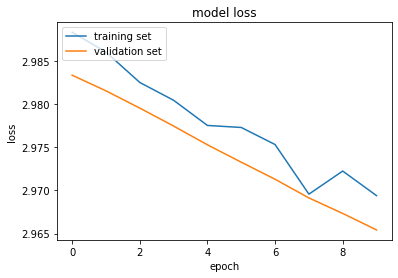

In [105]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

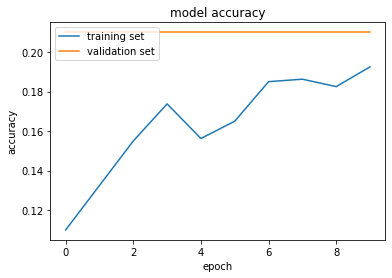

In [106]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [107]:
y_prob = model_cuisine.predict(X_test_bert_cuisine)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_cuisine,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        37
           8       0.00      0.00      0.00        11
           9       0.21      1.00      0.35       106
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00        16
          12       0.00      0.00      0.00        19
          13       0.00      0.00      0.00       101
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00        44
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Indian Food Data

In [108]:
model_RNN = RNNHyperModel(vocab_size_indian, 768, 2)

In [109]:
tuner = kt.Hyperband(
    model_RNN,
    objective='val_accuracy',
    max_epochs=30,
    hyperband_iterations=2, 
    overwrite=True)

In [110]:
tuner.search(X_train_bert_indian,y_train_indian,validation_data=(X_valid_bert_indian,y_valid_indian), epochs=10)

Trial 4 Complete [00h 00m 06s]
val_accuracy: 0.8671875

Best val_accuracy So Far: 0.8671875
Total elapsed time: 00h 00m 20s


In [111]:
bestHP = tuner.get_best_hyperparameters()[0]
print("[INFO] optimal number of filters in rnn1 layer: {}".format(bestHP.get("rnn1")))
print("[INFO] optimal number of units in dense layer: {}".format(bestHP.get("dense_units")))
print("[INFO] optimal learning rate: {}".format(bestHP.get("learning_rt")))

[INFO] optimal number of filters in rnn1 layer: 64
[INFO] optimal number of units in dense layer: 32
[INFO] optimal learning rate: 0.001


In [112]:
model_indian = tuner.get_best_models()[0]

In [113]:
history_fine = model_indian.fit(X_train_bert_indian,y_train_indian,validation_data=(X_valid_bert_indian,y_valid_indian), epochs=10)

Epoch 1/10
7/7 [==============================] - 2s 185ms/step - loss: 0.6917 - accuracy: 0.5245 - val_loss: 0.6860 - val_accuracy: 0.8672
Epoch 2/10
7/7 [==============================] - 1s 149ms/step - loss: 0.6860 - accuracy: 0.6324 - val_loss: 0.6815 - val_accuracy: 0.8672
Epoch 3/10
7/7 [==============================] - 1s 147ms/step - loss: 0.6799 - accuracy: 0.7206 - val_loss: 0.6773 - val_accuracy: 0.8672
Epoch 4/10
7/7 [==============================] - 1s 149ms/step - loss: 0.6752 - accuracy: 0.7647 - val_loss: 0.6732 - val_accuracy: 0.8672
Epoch 5/10
7/7 [==============================] - 1s 144ms/step - loss: 0.6720 - accuracy: 0.8137 - val_loss: 0.6687 - val_accuracy: 0.8672
Epoch 6/10
7/7 [==============================] - 1s 149ms/step - loss: 0.6650 - accuracy: 0.8480 - val_loss: 0.6643 - val_accuracy: 0.8672
Epoch 7/10
7/7 [==============================] - 1s 146ms/step - loss: 0.6656 - accuracy: 0.8627 - val_loss: 0.6600 - val_accuracy: 0.8672
Epoch 8/10
7/7 [====

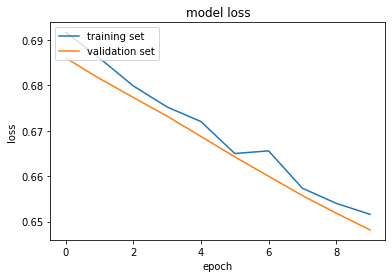

In [117]:
plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

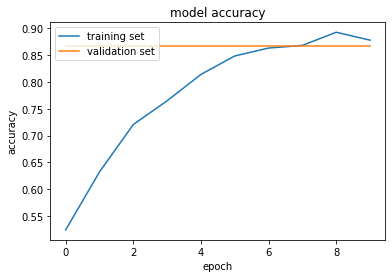

In [115]:
plt.plot(history_fine.history['accuracy'])
plt.plot(history_fine.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

In [116]:
y_prob = model_indian.predict(X_test_bert_indian)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test_int_indian,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.91      1.00      0.95       115

    accuracy                           0.91       127
   macro avg       0.45      0.50      0.48       127
weighted avg       0.82      0.91      0.86       127



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
